In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
import matplotlib.pyplot as plt

print("All Dependencies Installed !")

All Dependencies Installed !


In [11]:
# We'll discard labels since we dont need them.
(x_train,_),(x_test,_) = mnist.load_data()

# Scaling values to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flattening each 28x28 image to vector of size 784.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Data preparation completed !")

Data preparation completed !


In [12]:
# smaller bottleneck --> more compressed representation
bottleneck_size = 40
flattened_image_size = 28*28

input = Input(shape=(flattened_image_size,))
encoded = Dense(bottleneck_size,activation="relu")(input)
decoded = Dense(flattened_image_size,activation="sigmoid")(encoded)

# Maps input image to decoder's reconstructed image.
# AUTOENCODER
autoencoder = Model(input,decoded)

print("Autoencoder model created !")

Autoencoder model created !


In [13]:
# creating seperate encoder & decoder models to generate
# images after autoencoder is trained.

# ENCODER
encoder = Model(input,encoded)

# DECODER
encoded_input = Input(shape=(bottleneck_size,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

print("Encoder & Decoder model created !")

Encoder & Decoder model created !


In [14]:
# training the autoencoder.
autoencoder.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
# using self-supervised approach.
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(x_test,x_test))

print("Autoencoder training completed !")

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.3698 - accuracy: 0.0100 - val_loss: 0.1835 - val_accuracy: 0.0147
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1737 - accuracy: 0.0134 - val_loss: 0.1457 - val_accuracy: 0.0105
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1414 - accuracy: 0.0103 - val_loss: 0.1259 - val_accuracy: 0.0114
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1237 - accuracy: 0.0111 - val_loss: 0.1135 - val_accuracy: 0.0128
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1120 - accuracy: 0.0121 - val_loss: 0.1044 - val_accuracy: 0.0129
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1037 - accuracy: 0.0121 - val_loss: 0.0981 - val_accuracy: 0.0120
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0979 - accuracy: 0.0117 - val_loss: 0.0938 - val_accuracy: 0.0129

In [15]:
# Reconstructing test images using trained autoencoder.

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

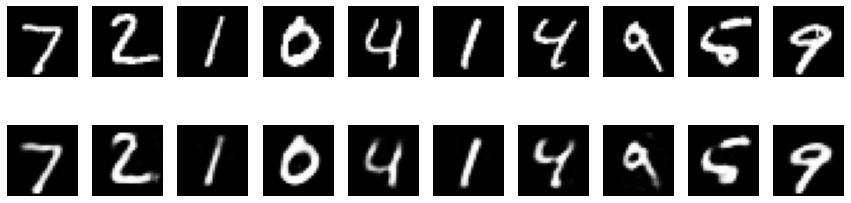

In [16]:
n = 10
plt.figure(figsize=(15, 4))

for i in range(n):

    # plotting actual images
    plt.subplot(2,n,i+1)
    plt.gray()
    plt.axis("off")
    plt.imshow(x_test[i].reshape(28,28))

    # plotting reconstructed images
    plt.subplot(2,n,i+1+n)
    plt.gray()
    plt.axis("off")
    plt.imshow(decoded_imgs[i].reshape(28,28))

plt.show()